# Twitter Sentiment Analysis 


<img src='https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/performing-twitter-sentiment-analysis1.jpg' width="400" height="200">

# Problem Statement
#### Dataset containing several tweets with positive and negative sentiment associated with it
- Cyber bullying and hate speech has been a menace for quite a long time,So our objective for this task is to detect speeches tweets associated with negative sentiments.From this dataset we classify a tweet as hate speech if it has racist or sexist tweets associated with it.

- So our task here is to classify racist and sexist tweets from other tweets and filter them out.

<img src="https://logodownload.org/wp-content/uploads/2014/09/twitter-logo-1.png" width="200" height="200">


# Dataset Description

Formally, given a training sample of tweets and labels, where **label ‘1’** denotes the tweet is **racist/sexist** and **label ‘0’** denotes the tweet is **not racist/sexist**,our objective is to predict the labels on the given test dataset.

- **id** : The id associated with the tweets in the given dataset.<br>
- **tweets** : The tweets collected from various sources and having either positive or negative sentiments associated with it.<br>
- **label** : A tweet with **label ‘0’** is of **positive sentiment** while a tweet with **label ‘1’** is of **negative sentiment**.

In [1]:
# importing warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

# importing the necessary packages
import re
import pandas as pd
import numpy as np
import string
import nltk

# importing libraries for visualization
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline

# Reading the train.csv file

In [2]:
# read the train.csv file 
train = pd.read_csv('train.csv')

We keep a copy of original train.csv file so that if we have to make any changes in this datasetwe would not lose original dataset.

In [3]:
#copying train.csv file
train_original = train.copy()

In [4]:
train

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."


As you can see we have 3 attributes present in our dataset and a total of 31962 labeled tweets , **‘1’** standing for tweets with **negative sentiment** and **‘0’** for tweets with **positive sentiments**.

In [5]:
train.shape

(31962, 3)

In [6]:
train.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

No null values in train dataset

# Reading the test.csv file 

In [7]:
test = pd.read_csv("test.csv")

In [8]:
# copying test data for safety purpose
test_original = test.copy()

In [9]:
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


As we can see we have 2 attributes present here that is ‘id’ and ‘tweets’. This is the dataset on which we are going to test our Machine Learning models so it is unlabeled.

In [10]:
test.shape

(17197, 2)

In [11]:
test.isnull().sum()

id       0
tweet    0
dtype: int64

No null values in test dataset

# Data Pre-Processing

<img src="https://www.electronicsmedia.info/wp-content/uploads/2017/12/Data-Preprocessing.jpg" alt= "Data Preprocessing" width="400" height="350">

Lets begin with pre-processing of our dataset

# Step-1

### Combine the train.csv and test.csv files 

Pandas **dataframe.append()** function is used to append rows of other dataframe to the end of the given dataframe, returning a new dataframe object

In [12]:
combine = pd.concat([train,test],ignore_index=True, sort=True)

In [13]:
combine.shape

(49159, 3)

Overview of combined dataset

In [14]:
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [15]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


Columns not in the test.csv are added as new columns and the new cells are populated with NaN values


# Step-2

### Removing Twitter Handles (@User)

In our analysis we can clearly see that the Twitter handles do not contribute anything significant to solve our problem. So it’s better if we remove them in our dataset.

Given below is a user-defined function to remove unwanted text patterns from the tweets.It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [16]:
def remove_pattern(text, pattern):
    
    # re.findall() finds the pattern i.e., @user and puts it in a list for further task
    r = re.findall(pattern, text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i, "", text)
    return text

In [17]:
# np.vectorize() is much more faster than conventional for loops when working on medium to large size dataset
combine['Clean_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], '@[\w]*')
combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
combine['Clean_Tweets'][1]

"  thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked"

# Step-3

### Removing Punctuation, Numbers, and Special charaters

Punctuation, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [19]:
combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]"," ")
combine.head(10)

C:\Users\Ritesh\AppData\Local\Temp\ipykernel_3724\3322482962.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  combine['Clean_Tweets'] = combine['Clean_Tweets'].str.replace("[^a-zA-Z#]"," ")


,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


In [20]:
combine['Clean_Tweets'][1]

'  thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx     #disapointed #getthanked'

# Step-4 
### Removing Stopwords

Stop words are words that don't add significant meaning to the text. You'll see the list provided by NLTK when you run the cells below.

In [21]:
# importing stopwords from nltk
from nltk.corpus import stopwords

#Import the english stop words list from NLTK
stopwords_english = stopwords.words('english') 

print('Stop words\n')
print(stopwords_english)

Stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

**Lets remove all the words having length 2 or less. For example, terms like "u",“oh” are of very little use. It is better to get rid of them.**

In [22]:
# removing words whose length less than 2
combine['Clean_Tweets'] = combine['Clean_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [23]:
# removing stopwords
combine['Clean_Tweets'] = combine['Clean_Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_english)]))
combine

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drags kids dysfun...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit use cause offer wheelchair...
2,3,0.0,bihday your majesty,bihday majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
...,...,...,...,...
49154,49155,NaN,thought factory: left-right polarisation! #tru...,thought factory left right polarisation #trump...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...,feeling like mermaid #hairflip #neverready #fo...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...,#hillary #campaigned today #ohio omg amp used ...
49157,49158,NaN,"happy, at work conference: right mindset leads...",happy work conference right mindset leads cult...


In [24]:
combine['Clean_Tweets'][0]

'father dysfunctional selfish drags kids dysfunction #run'

# Step-5 
### Tokenization

Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [25]:
# tokenizing the tweets
tokenized_tweet = combine['Clean_Tweets'].apply(lambda word: word.split())

In [26]:
tokenized_tweet

0        [father, dysfunctional, selfish, drags, kids, ...
1        [thanks, #lyft, credit, use, cause, offer, whe...
2                                        [bihday, majesty]
3                               [#model, love, take, time]
4                       [factsguide, society, #motivation]
                               ...                        
49154    [thought, factory, left, right, polarisation, ...
49155    [feeling, like, mermaid, #hairflip, #neverread...
49156    [#hillary, #campaigned, today, #ohio, omg, amp...
49157    [happy, work, conference, right, mindset, lead...
49158    [song, glad, free, download, #shoegaze, #newmu...
Name: Clean_Tweets, Length: 49159, dtype: object

# Step-6
### stemming

Stemming is the process of converting a word to its most general form, or stem. This helps in reducing the size of our vocabulary.

Consider the words: 
 * **learn**
 * **learn**ing
 * **learn**ed
 * **learn**t
 
All these words are stemmed from its common root **learn**. However, in some cases, the stemming process produces words that are not correct spellings of the root word. For example, **happi** and **sunni**. That's because it chooses the most common stem for related words. For example, we can look at the set of words that comprises the different forms of happy:

 * **happ**y
 * **happi**ness
 * **happi**er
 
We can see that the prefix **happi** is more commonly used. We cannot choose **happ** because it is the stem of unrelated words like **happen**.
 
NLTK has different modules for stemming and we will be using the [PorterStemmer](https://www.nltk.org/api/nltk.stem.html#module-nltk.stem.porter) module which uses the [Porter Stemming Algorithm](https://tartarus.org/martin/PorterStemmer/).

In [27]:
# model for stemming
from nltk import PorterStemmer

# Instantiate stemming class
ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [father, dysfunct, selfish, drag, kid, dysfunc...
1    [thank, #lyft, credit, use, caus, offer, wheel...
2                                    [bihday, majesti]
3                           [#model, love, take, time]
4                         [factsguid, societi, #motiv]
Name: Clean_Tweets, dtype: object

In [28]:
# joining tokens together
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Clean_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Clean_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit use caus offer wheelchair v...
2,3,0.0,bihday your majesty,bihday majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


We done with our data pre-processing. Now lets move to visualization and Models training..

# Visualiztion from Tweets

### Wordcloud

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

In [29]:
# importing packages necessary for generating a Wordcloud
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import urllib
import requests

**Store all the words from dataset which are positive(non racist or non-sexist)**

In [30]:
all_words_positive = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==0])

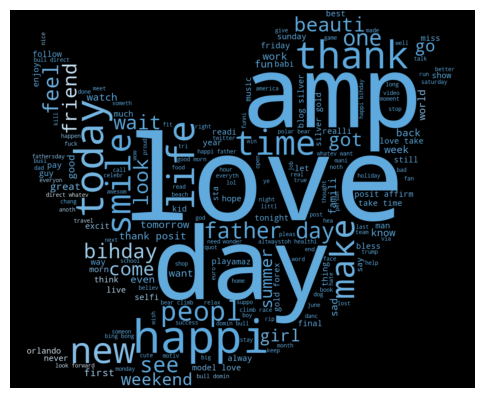

In [31]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

# Size of the image generated 
plt.figure(figsize=(6,8))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

#### We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets.

**Store all the words from the dataset which are racist/sexist**

In [32]:
all_words_negative = ' '.join(text for text in combine['Clean_Tweets'][combine['label']==1])

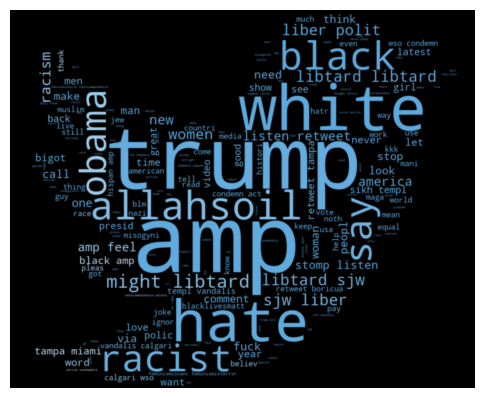

In [33]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)

# Size of the image generated 
plt.figure(figsize=(6,8))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Understanding the impact of hashtag(#)

<img src='https://www.socialtalent.com/wp-content/uploads/2015/07/Twitter-Logo-Hashtag.png' width="300" height="200">

In [34]:
# function to extract hashtag from tweets
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

## positive sentiment

#### A nested list of all the hashtags from the positive reviews from the dataset

In [35]:
ht_positive = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==0])

#### Here we unnest the list 

In [36]:
ht_positive_unnest = sum(ht_positive,[])

#### Counting the frequency of the words having Positive Sentiment 

In [37]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)

word_freq_positive

FreqDist({'love': 1654, 'posit': 917, 'smile': 676, 'healthi': 573, 'thank': 534, 'fun': 463, 'life': 425, 'affirm': 423, 'summer': 390, 'model': 375, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [38]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

In [39]:
df_positive

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
...,...,...
19658,kamp,1
19659,ucsd,1
19660,berlincitygirl,1
19661,genf,1


#### Plotting the barplot for the 20 most frequent words used for hashtags 

In [40]:
df_positive_plot = df_positive.nlargest(20,columns='Count') 

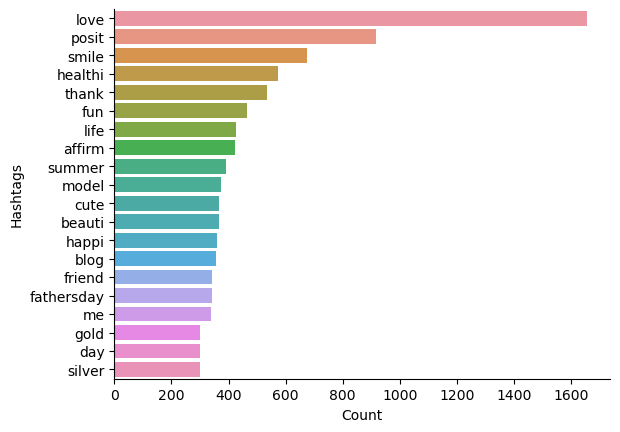

In [41]:
sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

**love, smile, fun, life, healthi, thank** are the popoular positive hashtag

## Negative sentiment

#### A nested list of all the hashtags from the negative reviews from the dataset

In [42]:
ht_negative = Hashtags_Extract(combine['Clean_Tweets'][combine['label']==1])

#### Here we unnest the list

In [43]:
ht_negative_unnest = sum(ht_negative,[])

#### Counting the frequency of the words having Negative Sentiment 

In [44]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

In [45]:
word_freq_negative

FreqDist({'trump': 136, 'polit': 95, 'allahsoil': 92, 'liber': 81, 'libtard': 77, 'sjw': 75, 'retweet': 63, 'black': 46, 'miami': 46, 'hate': 37, ...})

#### Creating a dataframe for the most frequently used words in hashtags

In [46]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

In [47]:
df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


#### Plotting the barplot for the 20 most frequent words used for hashtags 

In [48]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

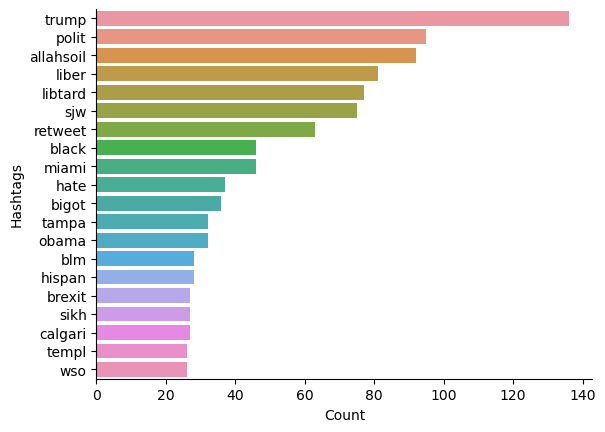

In [49]:
sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()

**trump, politics, allahsoil, liber, black, hate, libtard** these are popular negative hashtag

# Extracting features from cleaned tweets

### Bag-of-Words feature

Bag of Words is a method to extract features from text documents. These features can be used for training machine learning algorithms. It creates a vocabulary of all the unique words occurring in all the documents in the training set. 

Consider a corpus (a collection of texts) called C of D documents {d1,d2…..dD} and N unique tokens extracted out of the corpus C. The N tokens (words) will form a list, and the size of the bag-of-words matrix M will be given by D X N. Each row in the matrix M contains the frequency of tokens in document D(i).

For example, if you have 2 documents-



- D1: He is a lazy boy. She is also lazy.

- D2: Smith is a lazy person.

First, it creates a vocabulary using unique words from all the documents
#### [‘He’ , ’She’ , ’lazy’ , 'boy’ ,  'Smith’  , ’person’] 

- Here, D=2, N=6



- The matrix M of size 2 X 6 will be represented as:

![bow](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/07/table.png)

The above table depicts the training features containing term frequencies of each word in each document. This is called bag-of-words approach since the number of occurrence and not sequence or order of words matters in this approach.

In [50]:
# importing CountVectorizer from dklearn
from sklearn.feature_extraction.text import CountVectorizer

# initializing CountVectorizer to var bow_vectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combine['Clean_Tweets'])

# convert a sparse matrix to a dense matrix
df_bow = pd.DataFrame(bow.todense())

df_bow

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### TF-IDF feature

Tf-idf stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. 

Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.

- TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization: 
#### TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

- IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following: 
#### IDF(t) = log_e(Total number of documents / Number of documents with term t in it).


In [51]:
# importing tf-idf feature from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

# initializing tf-idf
tfidf=TfidfVectorizer(max_df=0.90, min_df=2,max_features=1000,stop_words='english')

tfidf_matrix=tfidf.fit_transform(combine['Clean_Tweets'])

#convert a sparse matrix to a dense matrix
df_tfidf = pd.DataFrame(tfidf_matrix.todense())

df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Applying Machine Learning Models

![ml](https://ak8.picdn.net/shutterstock/videos/23516428/thumb/12.jpg?i10c=img.resize(height:50))

### Using the features from Bag-of-Words Model for training set

In [52]:
#creates a new matrix train_bow that contains the first 31962 rows of the original bow matrix
train_bow = bow[:31962]

train_bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Using features from TF-IDF for training set

In [53]:
# creating new variable which represent first 31962 rows of sparse matrix
train_tfidf_matrix = tfidf_matrix[:31962]

train_tfidf_matrix.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Splitting the data into training and validation set

In [54]:
from sklearn.model_selection import train_test_split

#### Bag-of-Words Features

In [55]:
x_train_bow,x_valid_bow,y_train_bow,y_valid_bow = train_test_split(train_bow,train['label'],test_size=0.3,random_state=2)

#### Using TF-IDF features

In [56]:
x_train_tfidf,x_valid_tfidf,y_train_tfidf,y_valid_tfidf = train_test_split(train_tfidf_matrix,train['label'],test_size=0.3,random_state=17)

# Logistic Regression

In [57]:
# importing Logistic Regression from sklearn library
from sklearn.linear_model import LogisticRegression

In [58]:
# instantiating the logistic regression model
Log_Reg = LogisticRegression(random_state=0,solver='lbfgs')   #solver parameter specifies the algorithm to use for optimization

### Using Bag-of-Words Features 

In [59]:
# Fitting the Logistic Regression Model

Log_Reg.fit(x_train_bow,y_train_bow)

LogisticRegression(random_state=0)

In [60]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
prediction_bow = Log_Reg.predict_proba(x_valid_bow)

prediction_bow

array([[9.86282361e-01, 1.37176389e-02],
       [9.99825480e-01, 1.74520005e-04],
       [9.04218210e-01, 9.57817900e-02],
       ...,
       [9.42156011e-01, 5.78439889e-02],
       [9.58477598e-01, 4.15224019e-02],
       [9.67366631e-01, 3.26333693e-02]])

#### Calculating the F1 score

In [61]:
from sklearn.metrics import f1_score

In [62]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
prediction_int = prediction_bow[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_bow = f1_score(y_valid_bow, prediction_int)

log_bow

0.5747316267547481

### Using TF-IDF Features

In [63]:
Log_Reg.fit(x_train_tfidf,y_train_tfidf)

LogisticRegression(random_state=0)

In [64]:
prediction_tfidf = Log_Reg.predict_proba(x_valid_tfidf)

prediction_tfidf

array([[0.98883344, 0.01116656],
       [0.97524605, 0.02475395],
       [0.95206631, 0.04793369],
       ...,
       [0.98520094, 0.01479906],
       [0.98711753, 0.01288247],
       [0.9901198 , 0.0098802 ]])

#### Calculating the F1 score

In [65]:
prediction_int = prediction_tfidf[:,1]>=0.3

prediction_int = prediction_int.astype(np.int)
prediction_int

# calculating f1 score
log_tfidf = f1_score(y_valid_tfidf, prediction_int)

log_tfidf

0.5891341256366723

## XGBoost

In [66]:
from xgboost import XGBClassifier

### Using Bag-of-Words Features 

In [67]:
model_bow = XGBClassifier(random_state=22,learning_rate=0.9)

In [68]:
model_bow.fit(x_train_bow, y_train_bow)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.9, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=22, ...)

In [69]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb=model_bow.predict_proba(x_valid_bow)

xgb

array([[9.8891419e-01, 1.1085786e-02],
       [9.9978209e-01, 2.1790169e-04],
       [9.2901510e-01, 7.0984907e-02],
       ...,
       [9.3772697e-01, 6.2273033e-02],
       [9.2901510e-01, 7.0984907e-02],
       [9.2901510e-01, 7.0984907e-02]], dtype=float32)

#### Calculating the F1 score

In [70]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb=xgb[:,1]>=0.3

# converting the results to integer type
xgb_int=xgb.astype(np.int)

# calculating f1 score
xgb_bow=f1_score(y_valid_bow,xgb_int)

xgb_bow

0.5747303543913713

### Using TF-IDF Features 

In [71]:
model_tfidf=XGBClassifier(random_state=29,learning_rate=0.7)

In [72]:
model_tfidf.fit(x_train_tfidf, y_train_tfidf)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.7, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=29, ...)

In [73]:
# The first part of the list is predicting probabilities for label:0 
# and the second part of the list is predicting probabilities for label:1
xgb_tfidf=model_tfidf.predict_proba(x_valid_tfidf)

xgb_tfidf

array([[9.9856108e-01, 1.4389430e-03],
       [9.8900568e-01, 1.0994309e-02],
       [9.8724461e-01, 1.2755410e-02],
       ...,
       [9.8900014e-01, 1.0999847e-02],
       [9.9751878e-01, 2.4812438e-03],
       [9.9925703e-01, 7.4296509e-04]], dtype=float32)

#### Calculating the F1 score

In [74]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
xgb_tfidf=xgb_tfidf[:,1]>=0.3

# converting the results to integer type
xgb_int_tfidf=xgb_tfidf.astype(np.int)

# calculating f1 score
score=f1_score(y_valid_tfidf,xgb_int_tfidf)

score

0.5700861393891934

## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dct = DecisionTreeClassifier(criterion='entropy', random_state=1)

### Using Bag-of-Words Features

In [77]:
dct.fit(x_train_bow,y_train_bow)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [78]:
dct_bow = dct.predict_proba(x_valid_bow)

dct_bow

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [79]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_bow=dct_bow[:,1]>=0.3

# converting the results to integer type
dct_int_bow=dct_bow.astype(np.int)

# calculating f1 score
dct_score_bow=f1_score(y_valid_bow,dct_int_bow)

dct_score_bow

0.48412222887956863

### Using TF-IDF Features

In [80]:
dct.fit(x_train_tfidf,y_train_tfidf)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [81]:
dct_tfidf = dct.predict_proba(x_valid_tfidf)

dct_tfidf

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

#### Calculating F1 Score

In [82]:
# if prediction is greater than or equal to 0.3 than 1 else 0
# Where 0 is for positive sentiment tweets and 1 for negative sentiment tweets
dct_tfidf=dct_tfidf[:,1]>=0.3

# converting the results to integer type
dct_int_tfidf=dct_tfidf.astype(np.int)

# calculating f1 score
dct_score_tfidf=f1_score(y_valid_tfidf,dct_int_tfidf)

dct_score_tfidf

0.5498007968127491

# Model Comparisom

In [83]:
Algo=['LogisticRegression(Bag-of-Words)','XGBoost(Bag-of-Words)','DecisionTree(Bag-of-Words)','LogisticRegression(TF-IDF)','XGBoost(TF-IDF)','DecisionTree(TF-IDF)']

In [84]:
score = [log_bow,xgb_bow,dct_score_bow,log_tfidf,score,dct_score_tfidf]

compare=pd.DataFrame({'Model':Algo,'F1_Score':score},index=[i for i in range(1,7)])

In [85]:
compare.T

,1,2,3,4,5,6
Model,LogisticRegression(Bag-of-Words),XGBoost(Bag-of-Words),DecisionTree(Bag-of-Words),LogisticRegression(TF-IDF),XGBoost(TF-IDF),DecisionTree(TF-IDF)
F1_Score,0.574732,0.57473,0.484122,0.589134,0.570086,0.549801


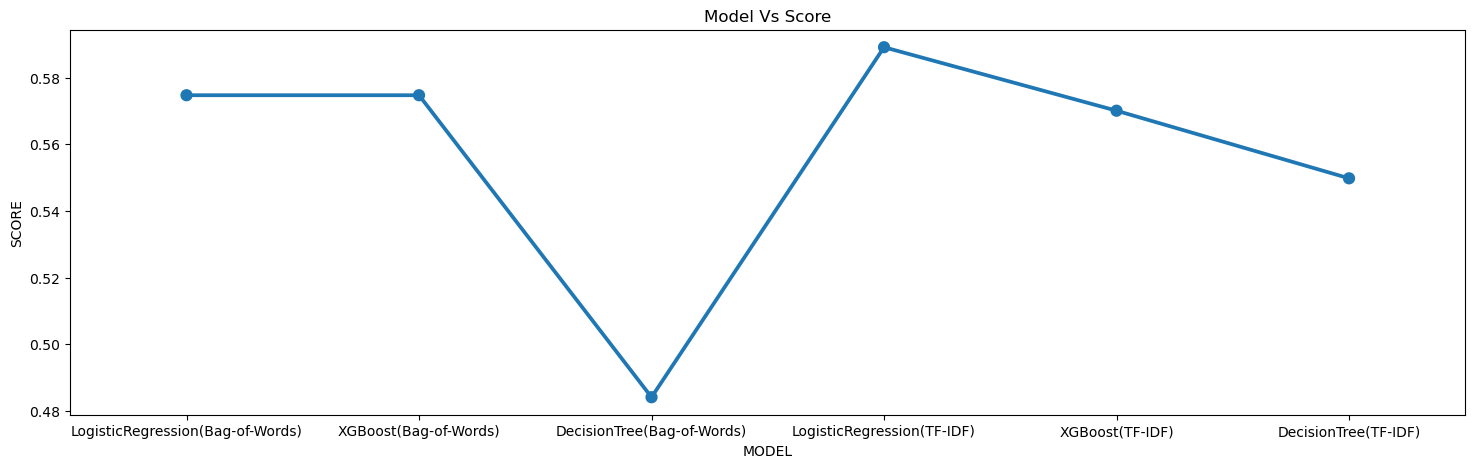

In [86]:
plt.figure(figsize=(18,5))

sns.pointplot(x='Model',y='F1_Score',data=compare)

plt.title('Model Vs Score')
plt.xlabel('MODEL')
plt.ylabel('SCORE')

plt.show()

## Using the best possible model to predict for the test data

#### From the above comaprison graph we can see that Logistic Regression trained using TF-IDF features gives us the best performance

In [87]:
test_tfidf = tfidf_matrix[31962:]

In [88]:
test_tfidf

<17197x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 70587 stored elements in Compressed Sparse Row format>

In [89]:
test_pred = Log_Reg.predict_proba(test_tfidf)

test_pred_int = test_pred[:,1] >= 0.3

test_pred_int = test_pred_int.astype(np.int)

test['label'] = test_pred_int

submission = test[['id','tweet','label']]

submission.to_csv('result.csv', index=False)

In [90]:
res = pd.read_csv('result.csv')
res

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,0
1,31964,@user #white #supremacists want everyone to s...,0
2,31965,safe ways to heal your #acne!! #altwaystohe...,0
3,31966,is the hp and the cursed child book up for res...,0
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",0
...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,1
17193,49156,feeling like a mermaid ð #hairflip #neverre...,0
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,1
17195,49158,"happy, at work conference: right mindset leads...",0


In [91]:
# Mapping '0' as 'Positive' and '1' as 'Negative'
res['label'] = res['label'].map({0: 'Positive', 1: 'Negative'})

In [92]:
res.head(10)

,id,tweet,label
0,31963,#studiolife #aislife #requires #passion #dedic...,Positive
1,31964,@user #white #supremacists want everyone to s...,Positive
2,31965,safe ways to heal your #acne!! #altwaystohe...,Positive
3,31966,is the hp and the cursed child book up for res...,Positive
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",Positive
5,31968,choose to be :) #momtips,Positive
6,31969,something inside me dies ð¦ð¿â¨ eyes nes...,Positive
7,31970,#finished#tattoo#inked#ink#loveitâ¤ï¸ #â¤ï¸...,Positive
8,31971,@user @user @user i will never understand why...,Positive
9,31972,#delicious #food #lovelife #capetown mannaep...,Positive


In [93]:
res.tail(10)

,id,tweet,label
17187,49150,loving lifeðºð¸âï¸ð #createyourfutu...,Positive
17188,49151,"black professor demonizes, proposes nazi style...",Negative
17189,49152,learn how to think positive. #positive #ins...,Positive
17190,49153,"we love the pretty, happy and fresh you! #teen...",Positive
17191,49154,2_damn_tuff-ruff_muff__techno_city-(ng005)-web...,Positive
17192,49155,thought factory: left-right polarisation! #tru...,Negative
17193,49156,feeling like a mermaid ð #hairflip #neverre...,Positive
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,Negative
17195,49158,"happy, at work conference: right mindset leads...",Positive
17196,49159,"my song ""so glad"" free download! #shoegaze ...",Positive


#### Lets view the distribution of sentiment in test data

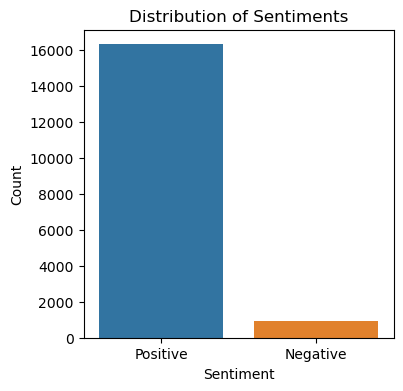

In [94]:
plt.figure(figsize=(4,4))
sns.countplot(x=res['label'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments')
plt.show()

# Summary

- From the given dataset we were able to predict on which class i.e Positive or Negative does the given tweet fall into.The following data was collected from Analytics Vidhya's site.

### Pre-processing 
1. Removing Twitter Handles(@user)
2. Removing puntuation,numbers,special characters
3. Removing short words i.e. words with length<=2
4. Tokenization
5. Stemming

### Data Visualisation
1. Wordclouds
2. Barplots

### Word Embeddings used to convert words to features for our Machine Learning Model

1. Bag-of-Words 
2. TF-IDF 

### Machine Learning Models used
1. Logistic Regression
2. XGBoost
3. Decision Trees 

### Evaluation Metrics 
- F1 score

### Why use F1-Score instead of Accuracy ?

- From the above countplot generated above we see how imbalanced our dataset is.We can see that the values with label:0 i.e. positive sentiments are quite high in number as compared to the values with labels:1 i.e. negative sentiments.


- So when we keep accuracy as our evaluation metric there may be cases where we may encounter high number of false positives.

#### Precison & Recall :- 
- Precision means the percentage of your results which are relevant.
- Recall refers to the percentage of total relevant results correctly classified by your algorithm
![met](https://cdn-images-1.medium.com/max/800/1*pOtBHai4jFd-ujaNXPilRg.png)

- We always face a trade-off situation between Precison and Recall i.e. High Precison gives low recall and vice versa.




- In most problems, you could either give a higher priority to maximizing precision, or recall, depending upon the problem you are trying to solve. But in general, there is a simpler metric which takes into account both precision and recall, and therefore, you can aim to maximize this number to make your model better. This metric is known as F1-score, which is simply the harmonic mean of precision and recall.

![f1](https://cdn-images-1.medium.com/max/800/1*DIhRgfwTcxnXJuKr2_cRvA.png)


- So this metric seems much more easier and convenient to work with, as you only have to maximize one score, rather than balancing two separate scores.